# Deep Learning 2019
## Assignment 5 - Optimization 
Please complete the questions below by modifying this notebook and send this file via e-mail to

__[pir-assignments@l3s.de](mailto:pir-assignments@l3s.de?subject=[DL-2019]%20Assignment%20X%20[Name]%20[Mat.%20No.]&)__

using the subject __[DL-2019] Assignment X [Name] [Mat. No.]__. The deadline for this assignment is __May 28th, 2019, 9AM__. Before your submission please replace fields __[Name]__ and __[Mat. No.]__ with your own name and registration number respectively (please keep the brackets), and replace the __X__ in the filename with the number of the current assignment.

Programming assignments have to be completed using Python 3. __Please do NOT use Python 2.__

__Always explain your answers__ (do not just write 'yes' or 'no').

Please add your name and matriculation number below:

__Name:__
<br>
__Mat. No.:__

----

### 1. Learning Rates
1. Label the curves with the following options and explain your choices:
  1. High learning rate 
  2. Low learning rate 
  3. Good learning rate
  4. Very high learning rate
  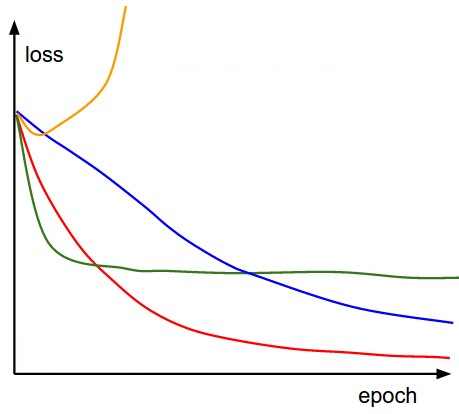
2. Which of the above options is more likely to cause (i) exploding gradients (ii) vanishing gradients and why?
3. Assume a unified learning rate is used in all parameter dimensions. What happens when gradient in one direction is much larger than in the other?

### Solution
1. 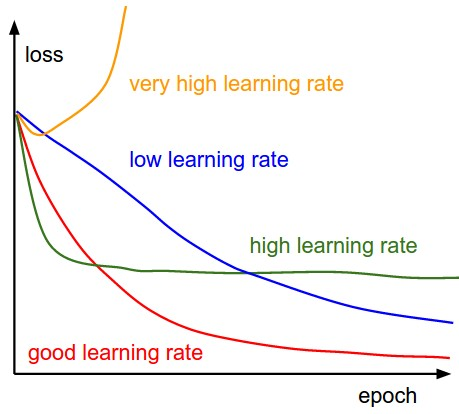

2. The learning rates DO NOT affect the gradients and are not responsible for vanishing/exploding gradients.

3. If the learning rate is too small, learning might be too small in the direction of small gradients. If the learning rate is too high, overshootng might ocuur in the direction with large gradient, optimmum might be missed.

### 2. Miscellaneous
1. What are the advantages of using minibatch gradient descent over full-batch gradient descent (simply called gradient descent)?
2. Which of the following statements are true? Explain your answers.
  1. The main goal of applying batch normalization is to achieve regularization.
  2. Batch normalizations only allows the the use of smaller learning rates.
  3. Normalizing the mean and standard deviation of a unit can reduce the expressive power of the neural network containing that unit.  
  4. Batch normalization normalizes the distribution of inputs to each layer, making it possible to use saturating non-linearities like sigmoid.  
3. What are the drawbacks of sigmoid activation?
4. How can ReLU help in reducing the possibility of vanishing gradients? What are the other advantages of using ReLU activation?

### Solution

1. The model update frequency with minibatch gradient descent is higher than full-batch gradient descent which allows for a more robust convergence, avoiding local minima. Moreover, the minibatching allows the efficiency of not having all training data in memory.

2. A is incorrect. Batch normalization introsuces some noise thereyby providing some regularization. 
B is incorrect. On the contrary, Batch normalization allows the use of larger training rates as it normalizes the input to each layer (for each diemension) thereby bringing the gradients of all directions in the same scale.  
C and D are correct. 

3. Sigmoid may cause vanishing and saturating gradients. The derivative of sigmoid function, $\sigma'(x) = \sigma(x) (1-\sigma(x) )$  which is always less than 1. Therefore the use of many sigmoid layers may cause vanishing gradients. Moreover for very large inputs, $\sigma(x)\rightarrow 1$, thereby causing the gradient to go to zero. 

4. The gradient of ReLU is always 1 as long as the input $\ge 0$, thereby overcoming the possibility of vanishing gradients for non-negative input. 
Other advantage: ReLU is fast to compute.


### 3. Effect of Momentum
It is introduced in the lecture that the momentum can accelerate the training while the hyperplane of the loss function is too flat. Another effect of momentum is avoiding the optimization algorithm from being trapped in a 'bad' local minimum and help to find the global minimum. Assume our loss function to be
\begin{equation}
    \mathcal{L}(\theta)=\theta \cdot cos(\pi \theta), \quad −1.0\leq \theta\leq 2.0,
\end{equation}
where $\theta$ is the parameter to solve. Implement the gradient descent algorithm using `numpy` to find the minima with initial values of $\theta_0 = -0.95$ and learning rate $\alpha = 0.01$. Does your algorithm get stuck at a local minimum? Use Momentum to solve this problem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def loss(theta):
    ret = theta * np.cos(np.pi * theta)
    if isinstance(theta, np.ndarray):
        ret[theta > 2.0] = 1e10
        ret[theta < -1.0] = 1e10
    else:
        if theta < -1.0 or theta > 2.0:
            ret = 1e10
    return ret


def grad(theta):
    ret = np.cos(np.pi * theta) - np.pi * theta * np.sin(np.pi * theta)
    if isinstance(theta, np.ndarray):
        ret[theta >  2.0] = 1e10
        ret[theta < -1.0] = -1e10
    else:
        if theta < -1.0:
            ret = -1e10
        elif theta > 2.0:
            ret = 1e10    
    return ret


def print_dot(**kwargs):
    if kwargs['iter'] % 100 == 0:
        print('.', end='')
    if kwargs['iter'] % 1000 == 0:
        print()
        
        
def sgd(init, loss, grad, learning_rate=0.01,
        converge_tol=1e-6, max_iter=10000, callbacks=[]):
    update = 1000.
    cur_iter = 0
    x = init
    cur_loss = loss(init)
    cur_grad = grad(init)
    history = []
    while abs(update) > converge_tol and cur_iter < max_iter:
        update = learning_rate * cur_grad
        x -= update
        cur_loss = loss(x)
        cur_grad = grad(x)
        cur_iter += 1
        for func in callbacks:
            func(iter=cur_iter, x=x, loss=cur_loss, grad=cur_grad)
        history.append((cur_iter, x, cur_loss, cur_grad))
    return history


def sgd_momentum(init, loss, grad, learning_rate=0.01, momentum_factor=0.6,
                 initial_momentum = 1.,
                 converge_tol=1e-6, max_iter=10000, callbacks=[]):
    update = 1000.
    cur_iter = 0
    x = init
    cur_loss = loss(init)
    cur_grad = grad(init)
    history = []
    momentum = initial_momentum
    while abs(update) > converge_tol and cur_iter < max_iter:    
        update = learning_rate * cur_grad
        momentum = momentum_factor * momentum - update
        x += momentum
        cur_loss = loss(x)
        cur_grad = grad(x)
        cur_iter += 1
        for func in callbacks:
            func(iter=cur_iter, x=x, momentum=momentum, loss=cur_loss, grad=cur_grad)
        history.append((cur_iter, x, momentum, cur_loss, cur_grad))
    return history
    
    
X = np.linspace(-1, 2, 100)
L = loss(X)

theta_0 = -0.95

plt.plot(X, L)
plt.grid()

sgd_hist = sgd(theta_0, loss, grad, callbacks=[print_dot])
sgd_updates = zip(sgd_hist[1:], sgd_hist[:-1])
sgd_updates = [(t[0][1]-t[1][1], t[0][2]-t[1][2]) for t in sgd_updates]
x_starts = [t[1] for t in sgd_hist[:-1]]
y_starts = [t[2] for t in sgd_hist[:-1]]
dxs = [t[0] for t in sgd_updates]
dys = [t[1] for t in sgd_updates]
plt.arrow(theta_0, loss(theta_0), 
          sgd_hist[0][1] - theta_0, 
          sgd_hist[0][2] - loss(theta_0), 
          shape='full', width=0.03, length_includes_head=True, color='r')
for x_start, y_start, dx, dy in zip(x_starts, y_starts, dxs, dys):
    plt.arrow(x_start, y_start, dx, dy, shape='full', width=0.02, length_includes_head=True, color='r')
    
momentum_hist = sgd_momentum(theta_0, loss, grad, callbacks=[print_dot])
m_updates = zip(momentum_hist[1:], momentum_hist[:-1])
m_updates = [(t[0][1]-t[1][1], t[0][3]-t[1][3]) for t in m_updates]
x_starts = [t[1] for t in momentum_hist[:-1]]
y_starts = [t[3] for t in momentum_hist[:-1]]
dxs = [t[0] for t in m_updates]
dys = [t[1] for t in m_updates]

plt.arrow(theta_0, loss(theta_0), 
          momentum_hist[0][1] - theta_0, 
          momentum_hist[0][3] - loss(theta_0), 
          shape='full', width=0.03, length_includes_head=True, color='y')
for x_start, y_start, dx, dy in zip(x_starts, y_starts, dxs, dys):
    plt.arrow(x_start, y_start, dx, dy, shape='full', width=0.03, length_includes_head=True, color='y')
    
plt.show()

.

<Figure size 640x480 with 1 Axes>

### 4. Effect of Optimization Techniques on Training Time and Accuracy
Let us revisit our question in assignment 3 on detecting separators in scanned newspapers. For this task, use either your own model or the simple model proposed in the solution.
1. Re-train the model with AdaGrad, ADAM and RMSProp individually and measure (i) time taken to train the model and (ii) accuracy on the test set.
2. How do the training time and accuracy change when you use Xavier initialization on vanilla CNN?
3. How do the training time and accuracy change when you use batch normalization with momentum?

In [2]:
import os
import skimage.io
import numpy as np
from matplotlib import pyplot
from sklearn.metrics import classification_report, confusion_matrix

def read_data(img_file_path, gt_file_path, convert_to_grayscale=False):
    if convert_to_grayscale:
        # imread flattens to shape (h, w) instead of (h, w, 1)
        img = skimage.io.imread(img_file_path, as_grey=True)
        h, w = img.shape
        img = img.reshape((h, w, 1))
    else:
        img = skimage.io.imread(img_file_path)
    # the GT only contains 2 labels, so we convert to monochrome
    gt = np.around(skimage.io.imread(gt_file_path, as_grey=True))
    return img, gt

img_file_path = os.path.join('data', 'img-001.jpg')
gt_file_path = os.path.join('data', 'img-001-gt.png')
img, gt = read_data(img_file_path, gt_file_path, True)

def __gt_value(gt_img, thresh):
    if len(gt_img[gt_img == 0]) / len(gt_img.flatten()) > thresh:
        return 1
    return 0

def get_images(img_data, gt_img_data, h, w, thresh):
    X_ = []
    y_ = []

    height, width, _ = img_data.shape
    y = 0
    while y + h < height:
        x = 0
        while x + w < width:
            ix = np.ix_(range(y, y + h), range(x, x + w))
            img = img_data[ix]
            gt_img = gt_img_data[ix]
            
            X_.append(img)
            y_.append(__gt_value(gt_img, thresh))

            x += w
        y += h
    return np.asarray(X_), np.asarray(y_)

X, y = get_images(img, gt, 15, 15, 0.1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

import random

def balance(X, y):
    assert len(X) == len(y)
    tr, fa = [], []
    for X_, y_ in zip(X, y):
        if y_ == 1:
            tr.append(X_)
        else:
            fa.append(X_)
    random.shuffle(tr)
    random.shuffle(fa)
    l = min(len(tr), len(fa))
    X_new = np.asarray(tr[:l] + fa[:l])
    y_new = np.asarray([1] * l + [0] * l) 
    return X_new, y_new

X_train, y_train = balance(X_train, y_train)

#from tensorflow import keras
import keras

def get_net(weight_init, bias_init, batch_norm=False, img_h=15, img_w=15,
            channels=1, kernels=3, init_size=64, dropout=0.1, dense_size=128):
    
    if batch_norm:
        # Note that there are two options of where to apply the BatchNormalization: before or after the activation.
        layers = [
            keras.layers.Conv2D(init_size, kernels, input_shape=(img_h, img_w, channels), activation='relu',
                                kernel_initializer=weight_init, bias_initializer=bias_init),
            keras.layers.BatchNormalization(),
            keras.layers.Conv2D(2 * init_size, kernels, activation='relu', kernel_initializer=weight_init,
                                bias_initializer=bias_init),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),
            keras.layers.Flatten(),
            keras.layers.Dense(dense_size, activation='relu', kernel_initializer=weight_init,
                               bias_initializer=bias_init),
            keras.layers.BatchNormalization(),
            keras.layers.Dropout(dropout),
            keras.layers.Dense(1, kernel_initializer=weight_init, bias_initializer=bias_init),
            keras.layers.BatchNormalization(),
            keras.layers.Activation('sigmoid')
    ]
    else:
        layers = [
            keras.layers.Conv2D(init_size, kernels, input_shape=(img_h, img_w, channels), activation='relu',
                                kernel_initializer=weight_init, bias_initializer=bias_init),
            keras.layers.Conv2D(2 * init_size, kernels, activation='relu', kernel_initializer=weight_init,
                                bias_initializer=bias_init),
            keras.layers.MaxPooling2D(pool_size=(2, 2)),
            keras.layers.Flatten(),
            keras.layers.Dense(dense_size, activation='relu', kernel_initializer=weight_init,
                               bias_initializer=bias_init),
            keras.layers.Dropout(dropout),
            keras.layers.Dense(1, activation='sigmoid', kernel_initializer=weight_init,
                               bias_initializer=bias_init)
        ]
    return keras.models.Sequential(layers)

def get_compiled_model(optimizer, weight_init='glorot_uniform', bias_init='zeros', batch_norm=False):
    model =  get_net(weight_init, bias_init, batch_norm)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

cb_ckpt = keras.callbacks.ModelCheckpoint('ckpt', monitor='val_loss', save_best_only=True, save_weights_only=True)
cb_early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

import time

class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

cb_timer = TimeHistory()

/home/assassin/.conda/envs/python36_tf1/lib/python3.6/site-packages/skimage/io/_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')
Using TensorFlow backend.


In [3]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

for optimizer in ['adagrad', 'adam', 'rmsprop']:
    print(f'=== {optimizer} ===')
    model = get_compiled_model(optimizer)
    history = model.fit(X_train, y_train, epochs=100, callbacks=[cb_early_stop, cb_ckpt, cb_timer], validation_split=0.1, verbose=0)
    print(f'Epochs: {len(history.history["loss"])}')
    print(f'Average time per epoch: {np.array(cb_timer.times).mean():.4}')
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test Accuracy: {acc:.4}\n')
    

=== adagrad ===
Epochs: 39
Average time per epoch: 3.543
Test Accuracy: 0.9524

=== adam ===
Epochs: 30
Average time per epoch: 3.633
Test Accuracy: 0.9196

=== rmsprop ===
Epochs: 26
Average time per epoch: 3.533
Test Accuracy: 0.9828



Keras already uses ['glorot_uniform'](https://keras.io/initializers/#glorot_uniform) (also called Xavier uniform) as its default initialization method. This the method corresponding to lecture 5 slide 26. So, the scores above already include Xavier uniform initialization.
For a comparison to something more vanilla, we can use simple random uniform sampling when initializing the weights:

In [4]:
for optimizer in ['adagrad', 'adam', 'rmsprop']:
    print(f'=== {optimizer} ===')
    model = get_compiled_model(optimizer, weight_init='random_uniform')
    history = model.fit(X_train, y_train, epochs=100, callbacks=[cb_early_stop, cb_ckpt, cb_timer], validation_split=0.1, verbose=0)
    print(f'Epochs: {len(history.history["loss"])}')
    print(f'Average time per epoch: {np.array(cb_timer.times).mean():.4}')
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test Accuracy: {acc:.4}\n')

=== adagrad ===
Epochs: 41
Average time per epoch: 3.5
Test Accuracy: 0.9046

=== adam ===
Epochs: 37
Average time per epoch: 3.614
Test Accuracy: 0.9401

=== rmsprop ===
Epochs: 20
Average time per epoch: 3.541
Test Accuracy: 0.5791



Using batch normalization (with default momentum):

In [5]:
for optimizer in ['adagrad', 'adam', 'rmsprop']:
    print(f'=== {optimizer} ===')
    model = get_compiled_model(optimizer, batch_norm=True)
    history = model.fit(X_train, y_train, epochs=100, callbacks=[cb_early_stop, cb_ckpt, cb_timer], validation_split=0.1, verbose=0)
    print(f'Epochs: {len(history.history["loss"])}')
    print(f'Average time per epoch: {np.array(cb_timer.times).mean():.4}')
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test Accuracy: {acc:.4}\n')

=== adagrad ===
Epochs: 21
Average time per epoch: 5.034
Test Accuracy: 0.987

=== adam ===
Epochs: 20
Average time per epoch: 5.145
Test Accuracy: 0.9336

=== rmsprop ===
Epochs: 16
Average time per epoch: 5.061
Test Accuracy: 0.9881



Using batch normalization improves the accuracy on the test set. On the other hand, the training times increased as well.